# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane had greater performance in decreasing the Tumor Volume compared to
other drug regimens based on the statistics table, both drugs have the LOWEST (Mean Tumor Volume, Median 
Tumor Volume, Tumor Volume Variance, Tumor Volume Std.Dev AND Tumor Volume Std. Err).
 
- The weight of the mice in this study also contributed to the Tumor volume, the Higher the 
weight the mice had the less effective the drug regimen was, this information can be seen when
using the Correlation and Regression model.

- Finally, if we look at the Line and Scatter Plots used to generate the data to treat each 
mouse with Capomulin, Mouse ID# "i557" was the ONLY mouse that did not respond well to the drug Capomulin 
observing a slight decrease in Tumor Volume the first 2 timepoints then increasing or no effect after that.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

# Change the local directory when you download the repo
import os
os.getcwd()
# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Combine the data into a single dataset
mouse_metadata = pd.read_csv (mouse_metadata_path)
study_results = pd.read_csv (study_results_path)
df = pd.merge(study_results, mouse_metadata,  how = "left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
len(df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
temp=df.groupby(["Mouse ID","Timepoint"])["Mouse ID"].count()
duplicate=temp[temp>=2]
duplicate

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Mouse ID, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df["Mouse ID"]==duplicate.index[0][0]]

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2=df[df["Mouse ID"]!=duplicate.index[0][0]]
df2.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
len(df2["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Mean_Tumor_Volume=df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume=df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Tumor_Volume_Variance=df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Tumor_Volume_Std_Dev=df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Tumor_Volume_Std_Err=df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary1=pd.DataFrame([Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err]).T
summary1.columns=["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev","Tumor Volume Std. Err"]
summary1


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev  Tumor Volume Std. Err  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median',"var","std","sem"])

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

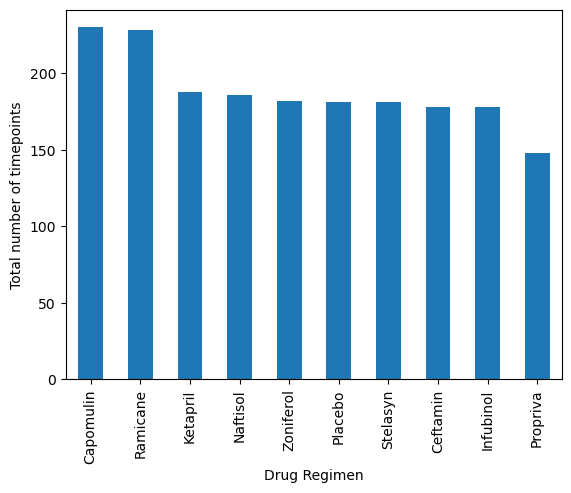

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
figure1=df2.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False).plot(kind="bar")
figure1.set_ylabel("Total number of timepoints")
figure1.set_xlabel("Drug Regimen")

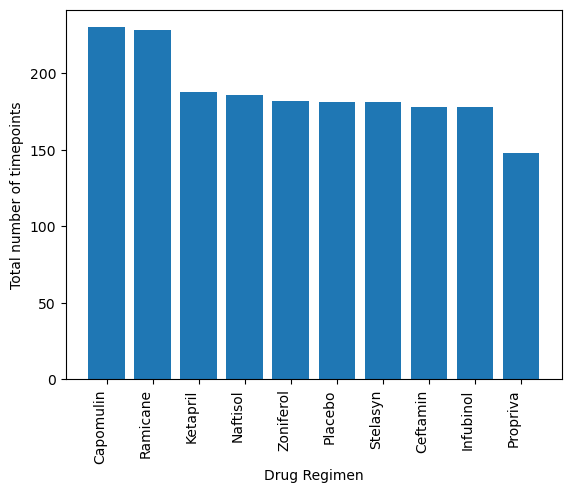

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
df3=pd.DataFrame(df2.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False))
df3.index.name = None
plt.bar(df3.index,df3["Timepoint"])
plt.xticks(rotation=90, ha='right')
plt.ylabel("Total number of timepoints")
plt.xlabel("Drug Regimen")
plt.show()

Text(0.5, 0, '')

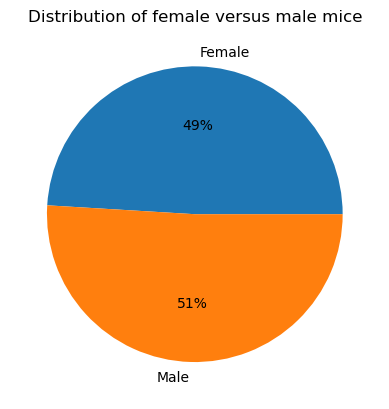

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
figure2=(df2.groupby(["Sex"])["Timepoint"].count()/len(df2["Sex"])).plot(kind='pie',autopct=lambda p: '{:.0f}%'.format(p),title='Distribution of female versus male mice')
figure2.set_ylabel("")
figure2.set_xlabel("")

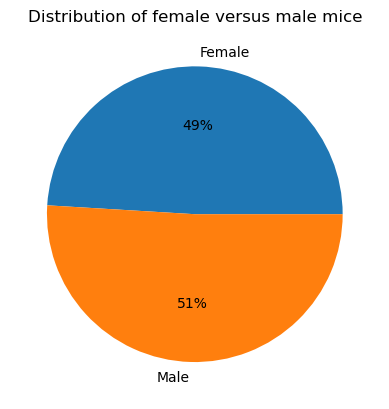

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df3=pd.DataFrame(df2.groupby(["Sex"])["Timepoint"].count()/len(df2["Sex"]))
df3.index.name = None
plt.pie(df3["Timepoint"],labels=df3.index,autopct=lambda p: '{:.0f}%'.format(p))
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_data=df2[df2['Drug Regimen'].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
final_data.sort_values(by="Timepoint")
final_data.drop_duplicates(subset=['Drug Regimen',"Timepoint"],keep='last')
final_data

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
############################## what does this(above statement) mean? We already merged two tables at the very beginning


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
29       c326          0           45.000000                 0    Infubinol   
30       c139          0           45.000000                 0    Infubinol   
31       v339          0           45.000000                 0    Infubinol   
32       a577          0           45.000000                 0    Infubinol   
...       ...        ...                 ...               ...          ...   
1879     a644         45           32.978522                 1     Ramicane   
1885     i177         45           33.562402                 3     Ramicane   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
29    Female          18          25  
30      Male          11          28  
31      Male          20          26  
32    Female           6          25  
...      ...         ...         ...  
1879  Female           7          17  
1885    Male          10          18  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  

[814 rows x 8 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regiment_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset    
    # Determine outliers using upper and lower bounds   
for i in regiment_list:
    box_data=final_data[['Drug Regimen',"Tumor Volume (mm3)"]]
    box_data=box_data[box_data["Drug Regimen"]==str(i)]
    #print(box_data)
    IQR=box_data.quantile(q=0.75) - box_data.quantile(q=0.25)
    lower=box_data.quantile(q=0.25)-1.5*IQR            
    upper=box_data.quantile(q=0.75)+1.5*IQR
    print("potential outliers for "+str(i)+" is(are)")
    outlier_upper=box_data[box_data["Tumor Volume (mm3)"]>float(upper.values)]["Tumor Volume (mm3)"].values 
    outlier_lower= box_data[box_data["Tumor Volume (mm3)"]<float(lower.values)]["Tumor Volume (mm3)"].values
    if len(outlier_upper)!=0:
        print(outlier_upper)
    elif len(outlier_lower) !=0:
        print(outlier_lower)
    else:
        print("No outliers") 

potential outliers for Capomulin is(are)
[25.47214326 23.34359787]
potential outliers for Ramicane is(are)
[22.05012627]
potential outliers for Infubinol is(are)
No outliers
potential outliers for Ceftamin is(are)
No outliers


Text(0.5, 1.0, '')

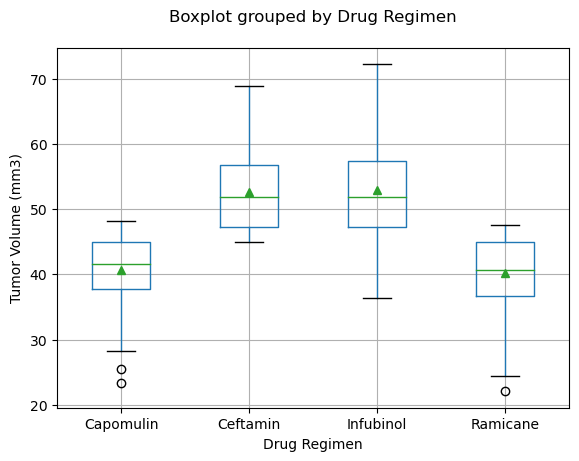

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
figure3=final_data[["Tumor Volume (mm3)","Drug Regimen"]].boxplot(by="Drug Regimen",showmeans=True)
figure3.set_ylabel("Tumor Volume (mm3)")
figure3.set_xlabel("Drug Regimen")
plt.title('')
#lt.suptitle('')

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

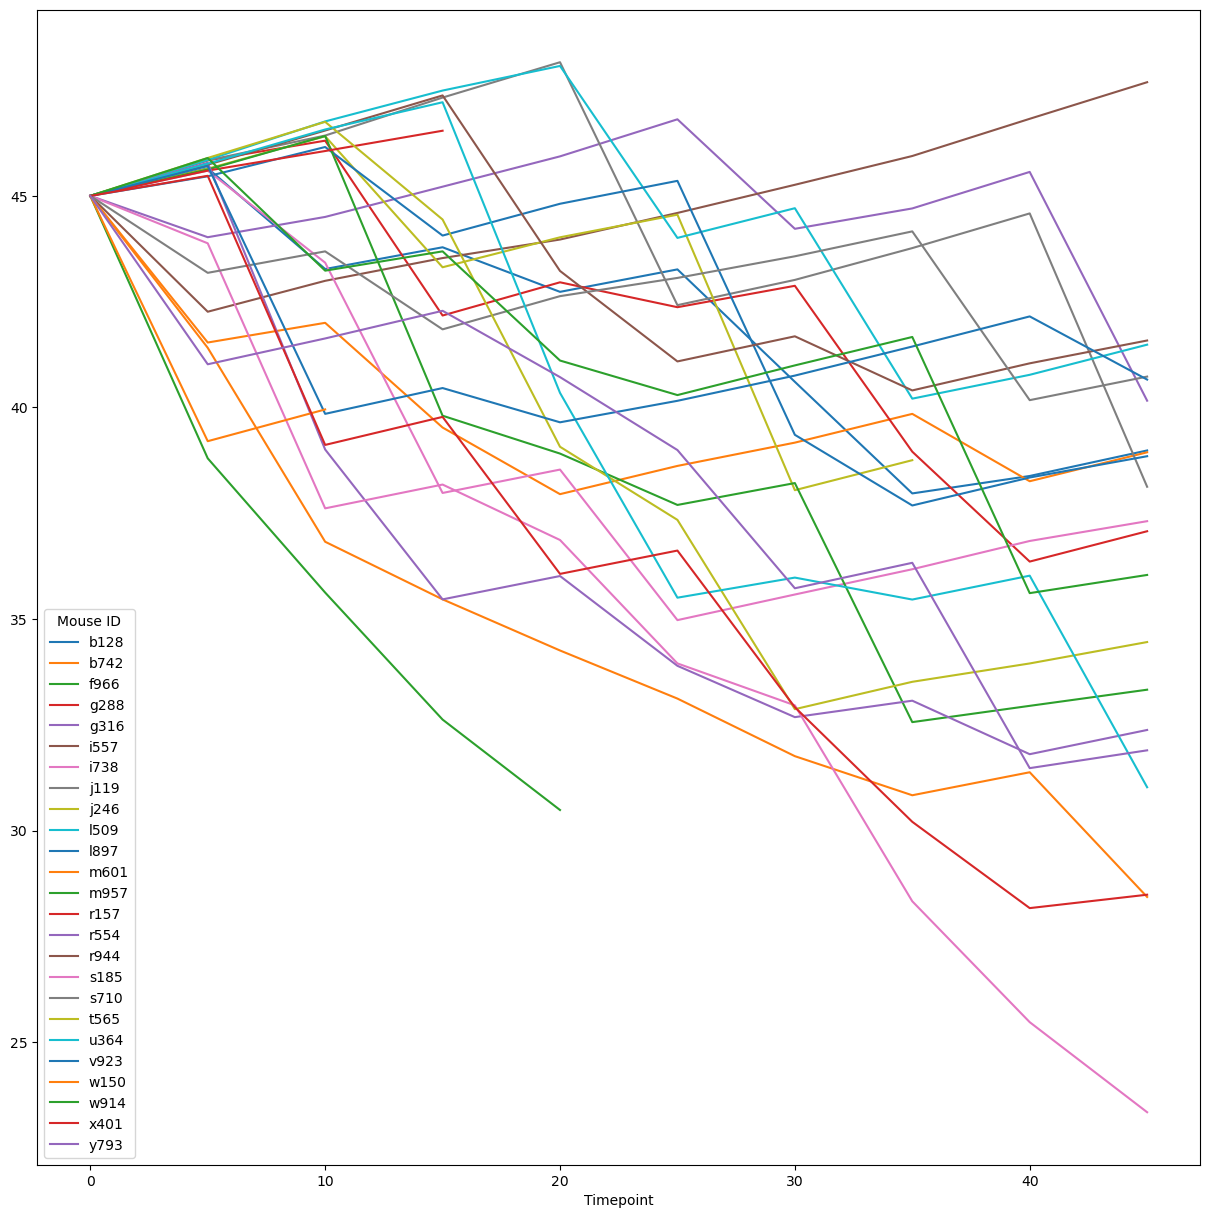

In [16]:
# Draw line plot to show the relashionship between Time point and Tumor Volume for each mouse
fig,ax=plt.subplots(figsize=(15,15))
Capomulin_data0=final_data[final_data["Drug Regimen"]=="Capomulin"]
Capomulin_data0.groupby(["Timepoint","Mouse ID"])["Tumor Volume (mm3)"].mean().unstack().plot(ax=ax)

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
temp=final_data[final_data["Mouse ID"]=="i557"]
temp

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
246      i557          0           45.000000                 0    Capomulin   
365      i557          5           42.261665                 0    Capomulin   
574      i557         10           42.992077                 0    Capomulin   
860      i557         15           43.529876                 0    Capomulin   
1052     i557         20           43.967895                 0    Capomulin   
1157     i557         25           44.596219                 0    Capomulin   
1309     i557         30           45.261384                 0    Capomulin   
1573     i557         35           45.941949                 0    Capomulin   
1712     i557         40           46.821070                 1    Capomulin   
1878     i557         45           47.685963                 1    Capomulin   

         Sex  Age_months  Weight (g)  
246   Female           1          24  
365   Female           1          24  
574   Female           1          24  
860   Female           1          24  
1052  Female           1          24  
1157  Female           1          24  
1309  Female           1          24  
1573  Female           1          24  
1712  Female           1          24  
1878  Female           1          24

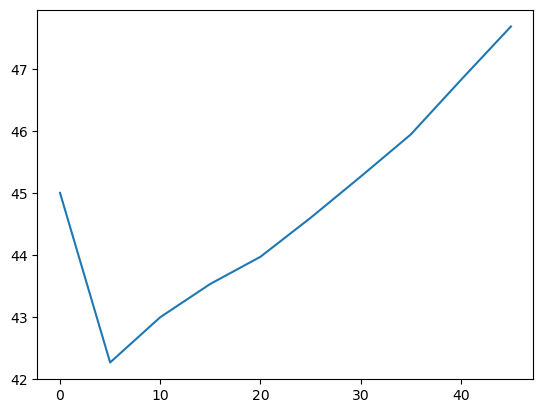

In [18]:
plt.plot(temp["Timepoint"],temp["Tumor Volume (mm3)"])

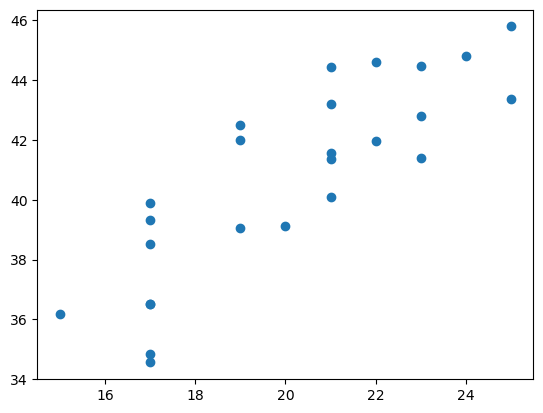

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_data=final_data[final_data["Drug Regimen"]=="Capomulin"]
Capomulin_data2=Capomulin_data.groupby(["Mouse ID"])[["Tumor Volume (mm3)","Weight (g)"]].mean()
plt.scatter(Capomulin_data2["Weight (g)"],Capomulin_data2["Tumor Volume (mm3)"])

## Correlation and Regression

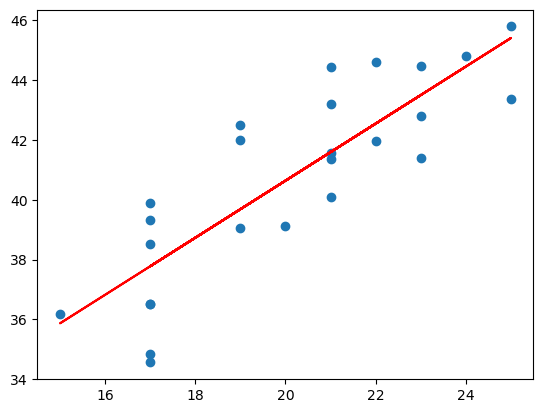

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import numpy as np
x=Capomulin_data2["Weight (g)"]
y=Capomulin_data2["Tumor Volume (mm3)"]
#create scatterplot
plt.scatter(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color="red")